## Principal Component Analysis (PCA)

In [8]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the libraries for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Reading final datset

df = pd.read_parquet('data/final_data/pueblo.parquet')

df.head()

,date,precip,max_temp,min_temp,gwl,sm_20cm,st_20cm,sm_50cm,st_50cm,sm_100cm,st_100cm,daily_discharge_cfs
85,2010-02-14,0.0,36,13,20.52,0.205500,0.408333,0.182875,1.320833,0.135333,3.700000,136.0
86,2010-02-15,0.0,41,7,20.51,0.215333,0.595833,0.183292,1.445833,0.137250,3.625000,129.0
87,2010-02-16,0.0,43,8,20.51,0.210417,0.500000,0.183625,1.495833,0.136583,3.700000,130.0
88,2010-02-17,0.0,51,10,20.51,0.209708,0.500000,0.184667,1.437500,0.135625,3.645833,132.0
89,2010-02-18,0.0,51,16,20.50,0.210542,0.637500,0.185125,1.479167,0.135333,3.708333,135.0


### PCA Analysis on Soil Moisture Data

In [25]:
# We can see that we have 3 different type of soil moisture data. 
# With PCA we aim to reduce the dimensionality of the data, here particularly the soil moisture data.

# creating feature list for soil moisture data
pca_sm_list = ['sm_20cm', 'sm_50cm', 'sm_100cm']

X = df[pca_sm_list]

# Standardizing the features
X_scaled = StandardScaler().fit_transform(X)


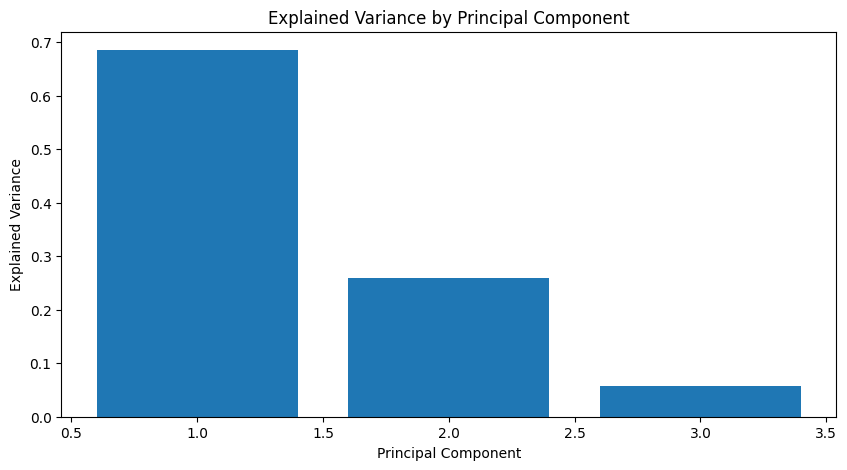

In [26]:
# Performing PCA with 3 components and plotting the explained variance

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

# Plotting the explained variance as bar plot
plt.figure(figsize=(10,5))
plt.bar(range(1,4), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()

#### We can see from the plots, the first principal component explains ~70% of the variance for soil moisture data

In [17]:
# We can use the first principal component to represent the soil moisture data.

# Adding the first principal component to the dataframe
df['sm_pca'] = principalDf['principal component 1']

### PCA Analysis for Soil Temperature Data

In [19]:
# We can see that we have 3 different type of soil temperature data. 
# With PCA we aim to reduce the dimensionality of the data, here particularly the soil temperature data.

# creating feature list for soil moisture data
pca_st_list = ['st_20cm', 'st_50cm', 'st_100cm']

X = df[pca_st_list]

# Standardizing the features
X_scaled = StandardScaler().fit_transform(X)


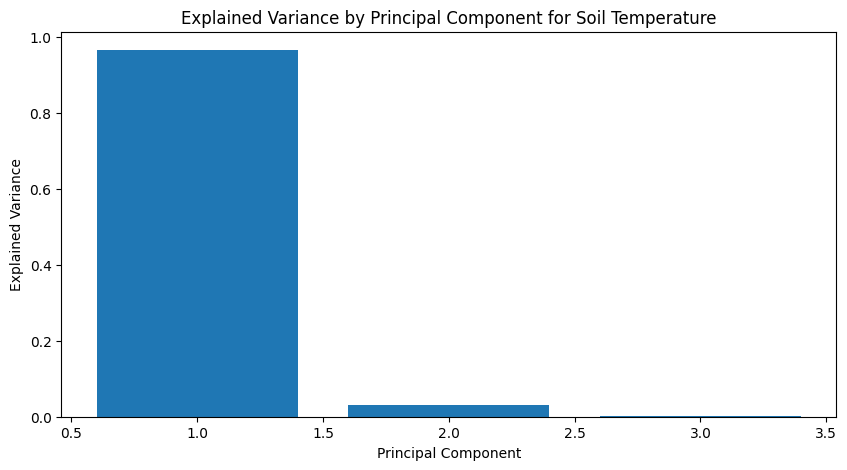

In [24]:
# Performing PCA with 3 components and plotting the explained variance

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

# Plotting the explained variance as bar plot
plt.figure(figsize=(10,5))
plt.bar(range(1,4), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component for Soil Temperature')
plt.show()

#### We can see from the plots, the first principal component explains  more than 90% of the variance for soil temperature data

In [22]:
# We can use the first principal component to represent the soil temperature data.

# Adding the first principal component to the dataframe
df['st_pca'] = principalDf['principal component 1']

In [27]:
# Reseting the index and dropping the old index
df.reset_index(drop=True, inplace=True)

In [29]:
# Saving the final dataframe with PCA data

df.to_parquet('data/final_data/pueblo_pca.parquet')